In [1]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv('spam.csv')

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df=df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [10]:
df=df.rename(columns={'v1':'Target','v2':'Text'})

In [11]:
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [13]:
df['Target']=encoder.fit_transform(df['Target'])

In [14]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### EXPLORATORY DATA ANALSIS

In [17]:
df['Target'].value_counts()

0    4825
1     747
Name: Target, dtype: int64

In [19]:
import matplotlib.pyplot as pyplot 

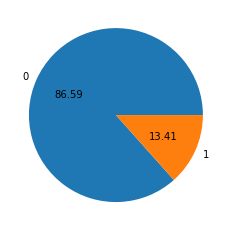

In [25]:
plt.pie(df['Target'].value_counts(),labels=['0','1'],autopct='%0.2f')
plt.show()

In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
df['num_characters']=df['Text'].apply(len)

In [34]:
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [35]:
df['num_sent']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [36]:
df.head()

,Target,Text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [40]:
df[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.695621,1.970747
std,59.690841,13.742587,1.417778
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,28.000000


In [45]:
df[df['Target']==0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.271917,1.808705
std,58.016023,13.988885,1.328227
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [46]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

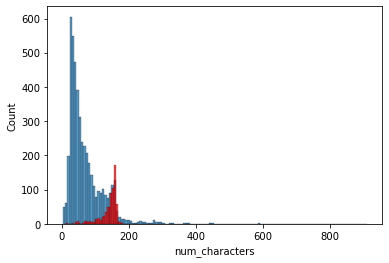

In [53]:
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

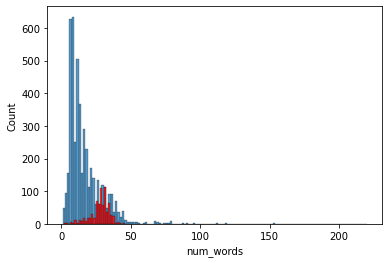

In [56]:
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sent', ylabel='Count'>

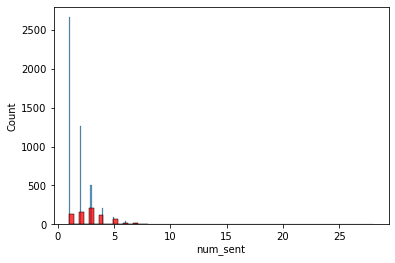

In [57]:
sns.histplot(df[df['Target']==0]['num_sent'])
sns.histplot(df[df['Target']==1]['num_sent'],color='red')

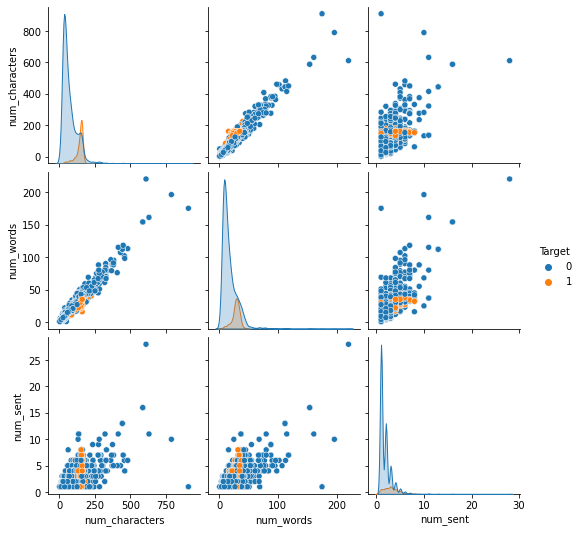

In [60]:
sns.pairplot(df,hue='Target')

<AxesSubplot:>

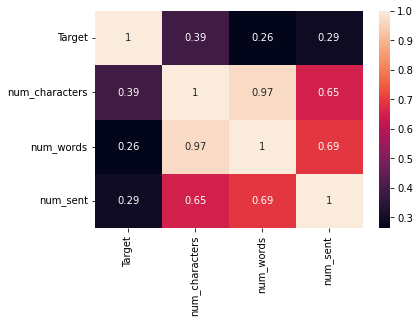

In [63]:
sns.heatmap(df.corr(),annot=True)

### DATA PREPROCESSING

In [72]:
from nltk.corpus import stopwords
import string
from collections import Counter
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [102]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [94]:
def transform_text1(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    #removies all symbol other than aphanum
    for i in text:
        if i.isalnum():
            y.append(i)
        
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    #return y
    return " ".join(y)

In [103]:
df['Text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 5572, dtype: object

In [104]:
df['Transformed_Text']=df['Text'].apply(transform_text1)
df['Transformed_Text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Transformed_Text, Length: 5572, dtype: object

In [105]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [106]:
spam_wc=wc.generate(df[df['Target']==1]['Transformed_Text'].str.cat(sep=" "))

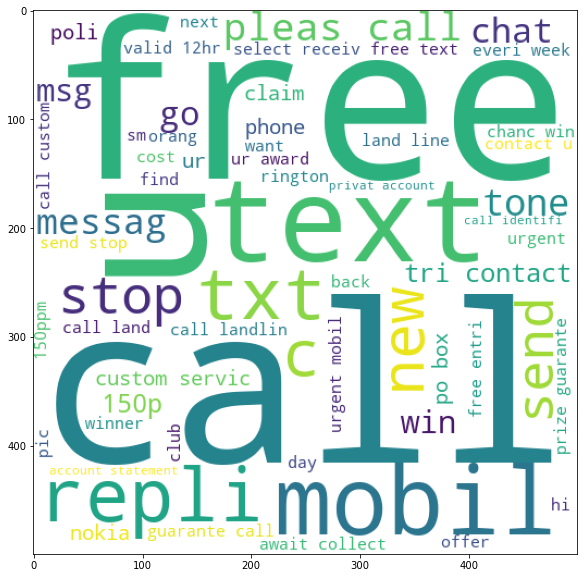

In [107]:
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)

In [112]:
ham_wc=wc.generate(df[df['Target']==0]['Transformed_Text'].str.cat(sep=" "))

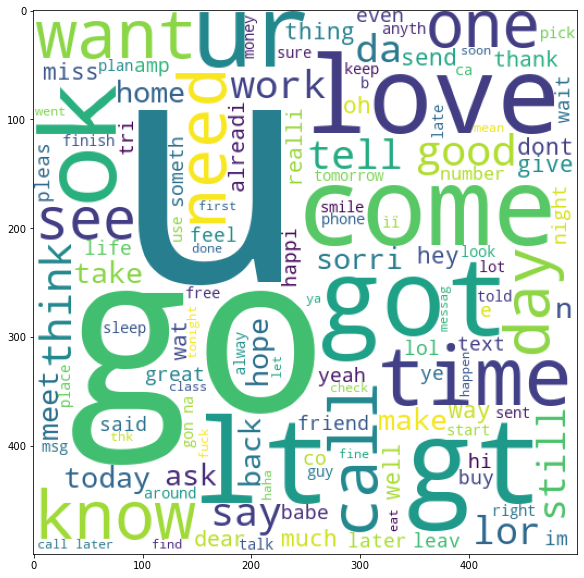

In [113]:
plt.figure(figsize=(20,10))
plt.imshow(ham_wc)

In [115]:
spam_corpus=[]
for msg in df[df['Target']==1]['Transformed_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [116]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [117]:
Counter(spam_corpus).most_common(30)

[('call', 365),
 ('free', 219),
 ('2', 174),
 ('txt', 169),
 ('ur', 144),
 ('u', 141),
 ('text', 139),
 ('mobil', 135),
 ('4', 120),
 ('claim', 115),
 ('stop', 114),
 ('repli', 112),
 ('prize', 94),
 ('get', 88),
 ('tone', 74),
 ('servic', 72),
 ('send', 70),
 ('new', 69),
 ('nokia', 68),
 ('award', 66),
 ('week', 62),
 ('cash', 62),
 ('urgent', 62),
 ('win', 61),
 ('contact', 61),
 ('pleas', 57),
 ('phone', 57),
 ('c', 51),
 ('custom', 51),
 ('collect', 51)]

In [118]:
ham_corpus=[]
for  msg in df[df['Target']==0]['Transformed_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

### MODEL BUILDING

In [119]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [120]:
x=cv.fit_transform(df['Transformed_Text']).toarray()

In [121]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [122]:
x.shape

(5572, 6708)

In [123]:
y=df['Target'].values

In [124]:
y.shape

(5572,)

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=2)

In [127]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [128]:
gnb.fit(x_train,y_train)
ypred1=gnb.predict(x_test)
print(accuracy_score(y_test,ypred1))
print(confusion_matrix(y_test,ypred1))
print(precision_score(y_test,ypred1))

0.873542600896861
[[843 114]
 [ 27 131]]
0.5346938775510204


In [129]:
mnb.fit(x_train,y_train)
ypred1=mnb.predict(x_test)
print(accuracy_score(y_test,ypred1))
print(confusion_matrix(y_test,ypred1))
print(precision_score(y_test,ypred1))

0.9713004484304932
[[942  15]
 [ 17 141]]
0.9038461538461539


In [131]:
bnb.fit(x_train,y_train)
ypred1=bnb.predict(x_test)
print(accuracy_score(y_test,ypred1))
print(confusion_matrix(y_test,ypred1))
print(precision_score(y_test,ypred1))

0.9695067264573991
[[956   1]
 [ 33 125]]
0.9920634920634921
